In [214]:
"""
Final Project: St. Louis Cardinals Data Analysis
Author: Reagan Phung

Tasks:
[Reagan] The top 10 players with the most starts/most games played Determine correlations based on the datasets
[Reagan] The top 10 players with the least amount of starts/least amount of games played

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm

In [216]:
def get_data(fileName):
    df = pd.read_csv(fileName)
    return df

In [217]:
from datetime import datetime, timedelta,date
today = datetime.strftime(datetime.now(), '%Y-%m-%d')

In [218]:
pitching_file = "team_pitching.csv"
batting_file = "team_batting.csv"
roster_file = "full_roster.csv"

In [219]:
batting_data = get_data(batting_file)
roster_data = get_data(roster_file)
pitching_data = get_data(pitching_file) 

In [220]:
pitching_data.describe()

,Rk,Age,W,L,W-L%,ERA,G,GS,GF,CG,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
count,32.000000,32.000000,32.000000,32.000000,21.000000,31.000000,32.000000,32.000000,32.00000,32.00000,...,32.000000,32.000000,30.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000
mean,16.500000,29.375000,2.812500,2.250000,0.572476,6.852258,22.437500,5.062500,4.96875,0.09375,...,2.062500,188.937500,94.00000,5.036774,1.669452,9.193548,0.900000,5.822581,7.132258,2.013333
std,9.380832,4.988697,3.855767,2.816999,0.281964,14.040074,20.234014,7.971471,9.91735,0.53033,...,2.577039,173.180297,40.49521,3.224653,1.418379,4.650157,0.831064,9.303609,2.837650,1.318626
min,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,...,0.000000,3.000000,10.00000,2.480000,0.884000,4.500000,0.000000,0.000000,0.000000,0.000000
25%,8.750000,25.000000,0.000000,0.000000,0.429000,3.230000,9.750000,0.000000,0.00000,0.00000,...,0.000000,50.000000,75.25000,3.825000,1.137500,7.050000,0.450000,2.500000,5.850000,1.117500
50%,16.500000,28.500000,1.000000,1.000000,0.545000,4.000000,17.500000,0.000000,2.00000,0.00000,...,1.000000,161.000000,94.50000,4.460000,1.372000,8.400000,0.900000,3.900000,6.800000,1.770000
75%,24.250000,34.000000,4.000000,4.250000,0.800000,4.830000,28.250000,9.500000,6.00000,0.00000,...,3.000000,293.750000,118.50000,5.210000,1.577500,9.450000,1.200000,5.650000,9.100000,2.457500
max,32.000000,39.000000,17.000000,9.000000,1.000000,81.000000,73.000000,32.000000,54.00000,3.00000,...,10.000000,828.000000,195.00000,21.170000,9.000000,27.000000,4.500000,54.000000,12.500000,6.000000


In [221]:
batting_data.describe()

,Rank,Age,Games,PA,AB,Runs,Hits,2B,3B,HR,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,38.000000,38.000000,38.000000,38.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,28.470588,45.901961,117.666667,104.921569,13.843137,25.549020,5.117647,0.431373,3.882353,...,0.202237,0.232289,0.434579,21.473684,43.176471,1.941176,1.686275,0.784314,0.862745,0.627451
std,14.866069,4.644795,48.609980,206.722390,186.563860,27.688534,50.081659,10.589895,1.024791,8.700913,...,0.151320,0.223839,0.365122,100.391864,86.448761,4.277437,3.690475,2.256668,1.811294,1.586957
min,1.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.500000,25.000000,11.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.064000,0.000000,0.078000,-75.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,27.000000,24.000000,16.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.243000,0.197000,0.430500,23.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.500000,32.000000,65.000000,107.000000,94.500000,11.500000,20.000000,2.500000,0.000000,2.000000,...,0.315750,0.389750,0.735000,104.750000,32.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,51.000000,39.000000,159.000000,691.000000,641.000000,102.000000,177.000000,41.000000,4.000000,34.000000,...,0.500000,1.000000,1.500000,305.000000,310.000000,20.000000,17.000000,14.000000,8.000000,8.000000


In [222]:
roster_data.describe()

,Age,Wt,G,GS,Batting,Defense,P,C,1B,2B,3B,SS,LF,CF,RF,OF,DH,PH,PR,WAR
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,28.470588,212.235294,46.745098,28.784314,45.901961,41.862745,14.098039,3.470588,3.392157,3.843137,3.490196,3.568627,3.568627,3.392157,3.882353,10.529412,0.215686,5.058824,0.215686,0.745098
std,4.644795,18.623199,48.439588,48.275590,48.609980,46.024350,19.393045,18.200388,21.461667,18.946633,21.712091,17.808150,18.498924,16.533697,14.065059,31.002808,0.729760,13.040570,0.576671,1.715496
min,22.000000,175.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400000
25%,25.000000,200.000000,11.500000,0.000000,11.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.150000
50%,27.000000,215.000000,25.000000,8.000000,24.000000,24.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
75%,32.000000,225.000000,66.500000,27.500000,65.000000,55.500000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,0.900000
max,39.000000,249.000000,159.000000,157.000000,159.000000,157.000000,73.000000,118.000000,153.000000,130.000000,155.000000,107.000000,131.000000,103.000000,87.000000,145.000000,4.000000,77.000000,2.000000,6.300000


In [223]:
pitching_data = pitching_data[pitching_data['FIP'].notnull()]
pitching_data = pitching_data[pitching_data['W-L%'].notnull()]
roster_data = roster_data.replace('1st',1)
batting_data = batting_data[batting_data['OPS'].notnull()]

### General

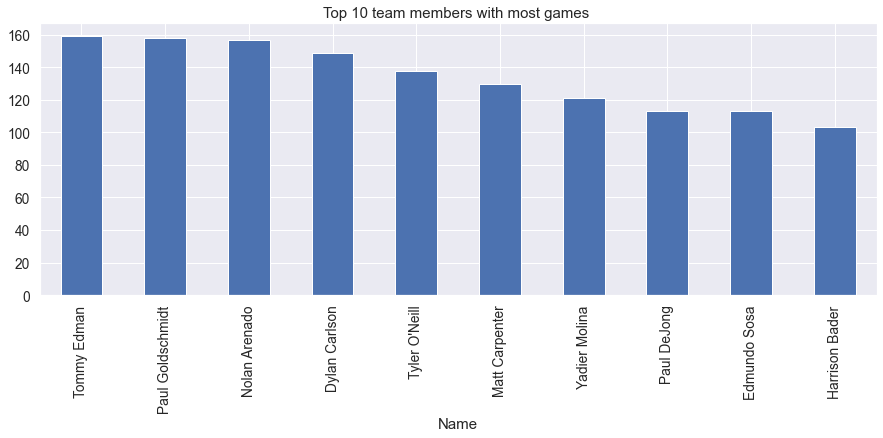

In [256]:
# The top 10 players with most games played
roster_data.groupby('Name').sum()['G'] \
    .sort_values(ascending=False)[:10] \
    .plot(kind='bar', figsize=(15, 5), title='Top 10 team members with most games ')
plt.show()

In [225]:
a = list(roster_data.groupby('Name').sum()['G'] \
    .sort_values(ascending=False)[:10].index)
a

['Tommy Edman',
 'Paul Goldschmidt',
 'Nolan Arenado',
 'Dylan Carlson',
 "Tyler O'Neill",
 'Matt Carpenter',
 'Yadier Molina',
 'Paul DeJong',
 'Edmundo Sosa',
 'Harrison Bader']

In [226]:
most_game_players = roster_data[roster_data['Name'].isin(a)]
most_game_players = most_game_players.sort_values(by='WAR',ascending=False)
most_game_shortened1 = most_game_players[['Name','Yrs','G','WAR']]
most_game_shortened1

,Name,Yrs,G,WAR
35,Tyler O'Neill,4,138,6.3
16,Paul Goldschmidt,11,158,6.1
0,Nolan Arenado,9,157,4.1
1,Harrison Bader,5,103,3.9
8,Tommy Edman,3,159,3.7
3,Dylan Carlson,2,149,3.2
43,Edmundo Sosa,3,113,3.2
31,Yadier Molina,18,121,1.8
6,Paul DeJong,5,113,1.6
4,Matt Carpenter,11,130,-1.0


In [227]:
most_game_batters = batting_data[batting_data['Name'].isin(a)]
most_game_shortened2 = most_game_batters[['Name','OPS+']]
most_game_shortened2

,Name,OPS+
0,Yadier Molina,86.0
1,Paul Goldschmidt,143.0
2,Tommy Edman,93.0
3,Paul DeJong,86.0
4,Nolan Arenado,121.0
5,Tyler O'Neill,150.0
6,Harrison Bader,116.0
7,Dylan Carlson,117.0
8,Edmundo Sosa,106.0
9,Matt Carpenter,65.0


In [265]:
most_game_combined = most_game_shortened1.merge(most_game_shortened2,how='left')
most_game_combined

,Name,Yrs,G,WAR,OPS+
0,Tyler O'Neill,4,138,6.3,150.0
1,Paul Goldschmidt,11,158,6.1,143.0
2,Nolan Arenado,9,157,4.1,121.0
3,Harrison Bader,5,103,3.9,116.0
4,Tommy Edman,3,159,3.7,93.0
5,Dylan Carlson,2,149,3.2,117.0
6,Edmundo Sosa,3,113,3.2,106.0
7,Yadier Molina,18,121,1.8,86.0
8,Paul DeJong,5,113,1.6,86.0
9,Matt Carpenter,11,130,-1.0,65.0


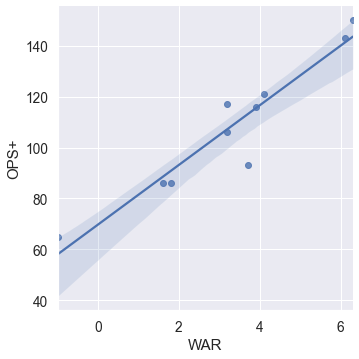

In [229]:
#Relationship between WAR and OPS+
sns.lmplot(x = 'WAR', y = 'OPS+', data= most_game_combined)

<ipython-input-230-399ec2b0074f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


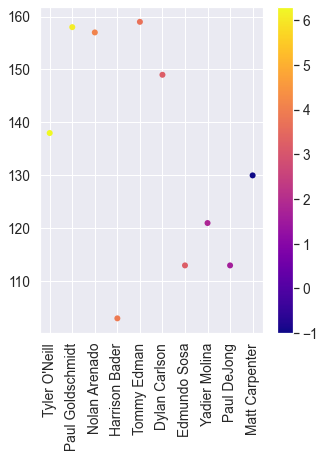

In [230]:
# Most games players & WARs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.cm as cmx
x = most_game_combined['Name']
y = most_game_combined['G']
z = most_game_combined['WAR']

fig, ax = plt.subplots(figsize=(5,6))
ax.set_xticklabels(x, rotation=90)
points = ax.scatter(x, y, c=z,cmap='plasma', lw=0)
plt.colorbar(points)

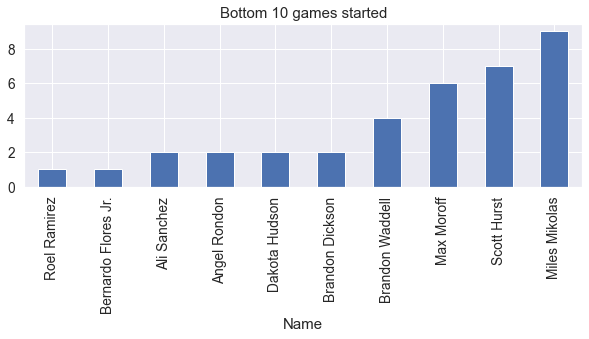

In [258]:
# The top 10 players with the least amount of games played
roster_data.groupby('Name').sum()['G'] \
    .sort_values(ascending=True)[:10] \
    .plot(kind='bar', figsize=(10, 3), title='Bottom 10 games started')
plt.show()

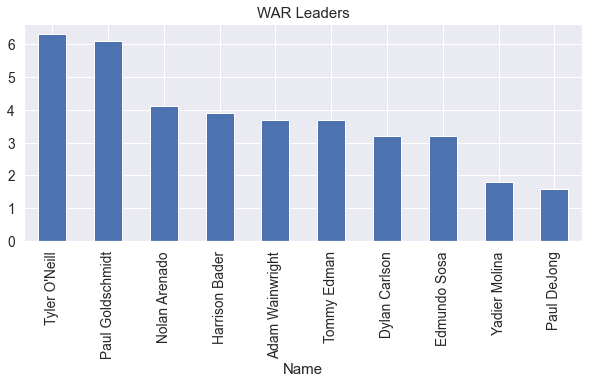

In [259]:
# Top 10 Players by WAR (good = 3-4)
roster_data.groupby('Name').sum()['WAR'] \
    .sort_values(ascending=False)[:10] \
    .plot(kind='bar', figsize=(10, 4), title='WAR Leaders')
plt.show()

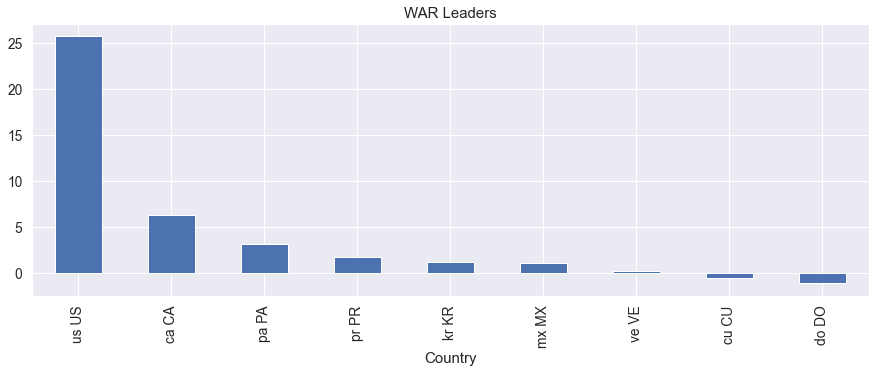

In [233]:
# WAR by Country
roster_data.groupby('Country').sum()['WAR'] \
    .sort_values(ascending=False)[:10] \
    .plot(kind='bar', figsize=(15, 5), title='WAR Leaders')
plt.show()

### Pitchers

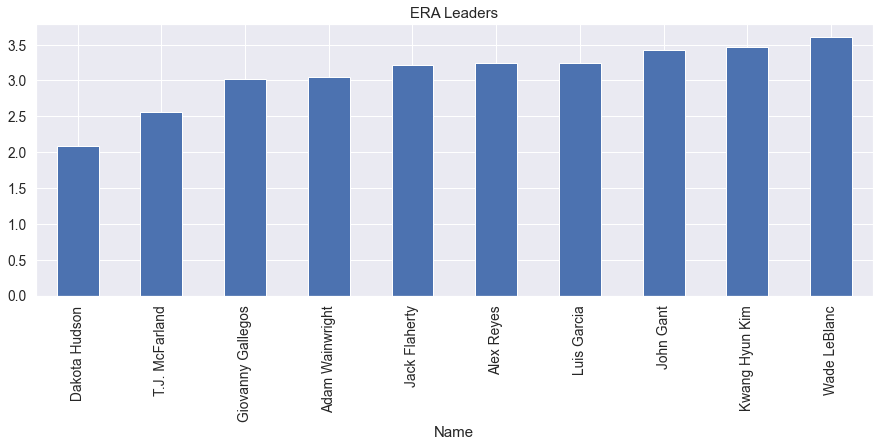

In [234]:
# Top 10 Players by ERA (acceptable ERA is 4-5)
pitching_data.groupby('Name').sum()['ERA'] \
    .sort_values(ascending=True)[:10] \
    .plot(kind='bar', figsize=(15, 5), title='ERA Leaders')
plt.show()

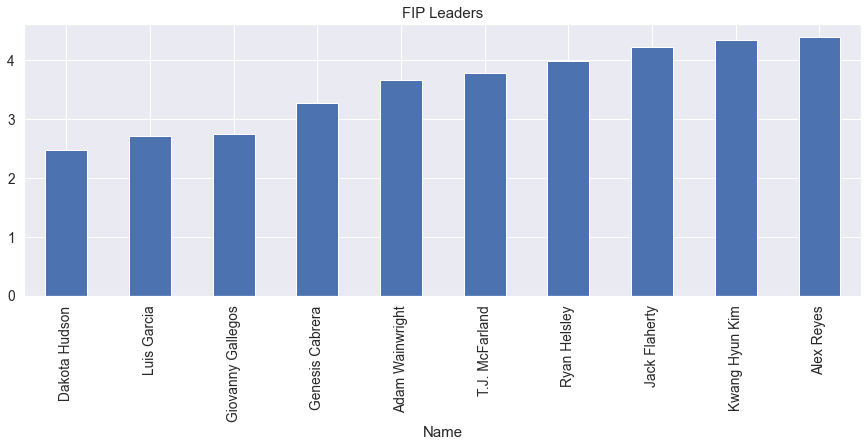

In [235]:
# Top 10 Players by FIP (acceptable is 4.2)
pitching_data.groupby('Name').sum()['FIP']\
    .sort_values(ascending=True)[:10] \
    .plot(kind='bar', figsize=(15, 5), title='FIP Leaders')
plt.show()

### Batters

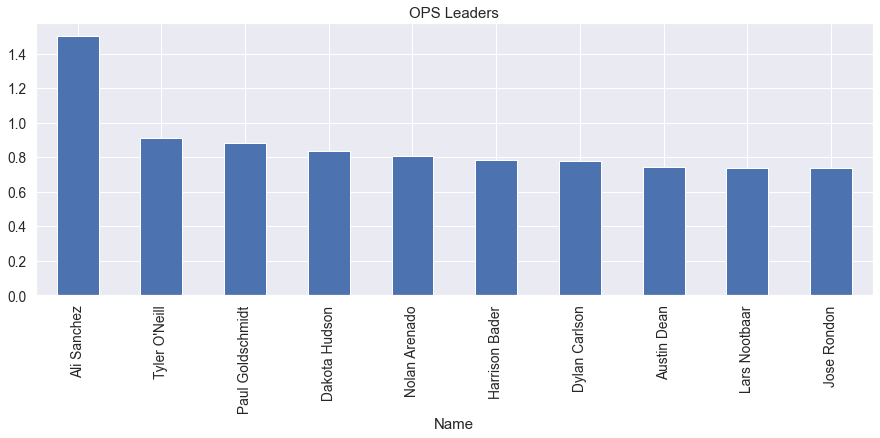

In [236]:
# Top 10 Players by OPS (average = 0.7)
batting_data.groupby('Name').sum()['OPS'] \
    .sort_values(ascending=False)[:10] \
    .plot(kind='bar', figsize=(15, 5), title='OPS Leaders')
plt.show()

C:\Users\Shane\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


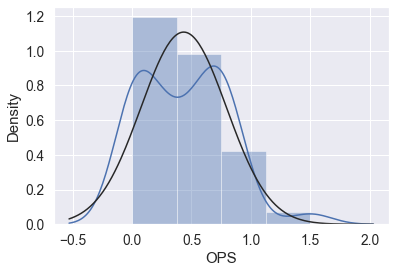

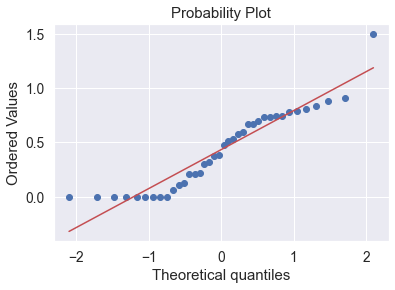

In [237]:
sns.distplot(batting_data['OPS'], fit = norm);
fig = plt.figure()
res = stats.probplot(batting_data['OPS'], plot = plt)

In [238]:
# batters eligible to be considered for a hitting title (PA > 3.1 per game)
qualified_batter = batting_data[(batting_data['PA']/batting_data['Games'] > 3.1)]
qualified_batter

,Rank,Position,Name,Age,Games,PA,AB,Runs,Hits,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,C,Yadier Molina,38,121,473,440,45,111,19,...,0.297,0.370,0.667,86.0,163,16,5,0,3,1
1,2,1B,Paul Goldschmidt,33,158,679,603,102,177,36,...,0.365,0.514,0.879,143.0,310,13,4,0,5,2
2,3,2B,Tommy Edman,26,159,691,641,91,168,41,...,0.308,0.387,0.695,93.0,248,4,6,2,4,1
3,4,SS,Paul DeJong,27,113,402,356,44,70,10,...,0.284,0.390,0.674,86.0,139,6,9,0,2,0
4,5,3B,Nolan Arenado,30,157,653,593,81,151,34,...,0.312,0.494,0.807,121.0,293,20,3,0,7,8
5,6,LF,Tyler O'Neill,26,138,537,482,89,138,26,...,0.352,0.560,0.912,150.0,270,8,13,0,4,0
6,7,CF,Harrison Bader,27,103,401,367,45,98,21,...,0.324,0.460,0.785,116.0,169,4,5,0,2,6
7,8,RF,Dylan Carlson,22,149,619,542,79,144,31,...,0.343,0.437,0.780,117.0,237,5,11,1,8,2


In [239]:
# pitchers not eligible to be considered for ERA title (IP < 1)
unqualified_pitcher = pitching_data[(pitching_data['IP']/pitching_data['G'] < 1)]
unqualified_pitcher

,Rk,Pos,Name,Age,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
8,9,RP,Genesis Cabrera,24,4,5,0.444,3.73,71,0,...,9,296,104.0,3.28,1.257,6.7,0.4,4.6,9.9,2.14
9,10,RP,Ryan Helsley,26,6,4,0.600,4.56,51,0,...,7,206,85.0,3.99,1.415,7.6,0.8,5.1,8.9,1.74
18,19,NaN,Luis Garcia,34,1,1,0.500,3.24,34,0,...,3,135,121.0,2.72,0.990,6.8,0.5,2.2,9.2,4.25
22,23,NaN,Justin Miller,34,1,0,1.000,4.50,18,0,...,0,68,88.0,4.98,1.250,8.4,1.1,2.8,5.1,1.80


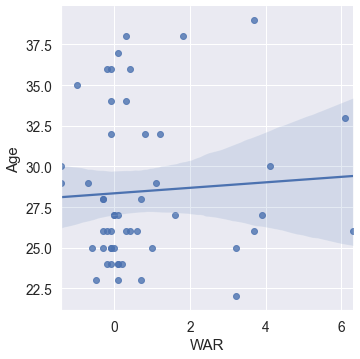

In [240]:
import seaborn as sns
#Relationship between age and WAR
sns.lmplot(x = 'WAR', y = 'Age', data= roster_data)

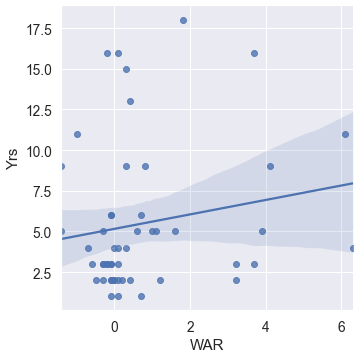

In [241]:
#Relationship between year and WAR
roster_data['Yrs'] = roster_data['Yrs'].astype(int)
sns.lmplot(x = 'WAR', y = 'Yrs', data= roster_data)

In [242]:
# Very good players
roster_data[roster_data['WAR'] > 5]

,Name,Age,Country,B,T,Ht,Wt,DoB,Yrs,G,...,SS,LF,CF,RF,OF,DH,PH,PR,WAR,Status
16,Paul Goldschmidt,33,us US,R,R,6' 3,220,Sep 10 1987,11,158,...,0,0,0,0,0,4,1,0,6.1,NaN
35,Tyler O'Neill,26,ca CA,R,R,5' 11,200,Jun 22 1995,4,138,...,0,131,0,0,131,1,6,0,6.3,NaN


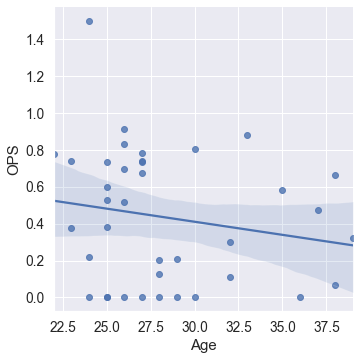

In [243]:
#Relationship between age and OPS+
sns.lmplot(x = 'Age', y = 'OPS', data= batting_data)

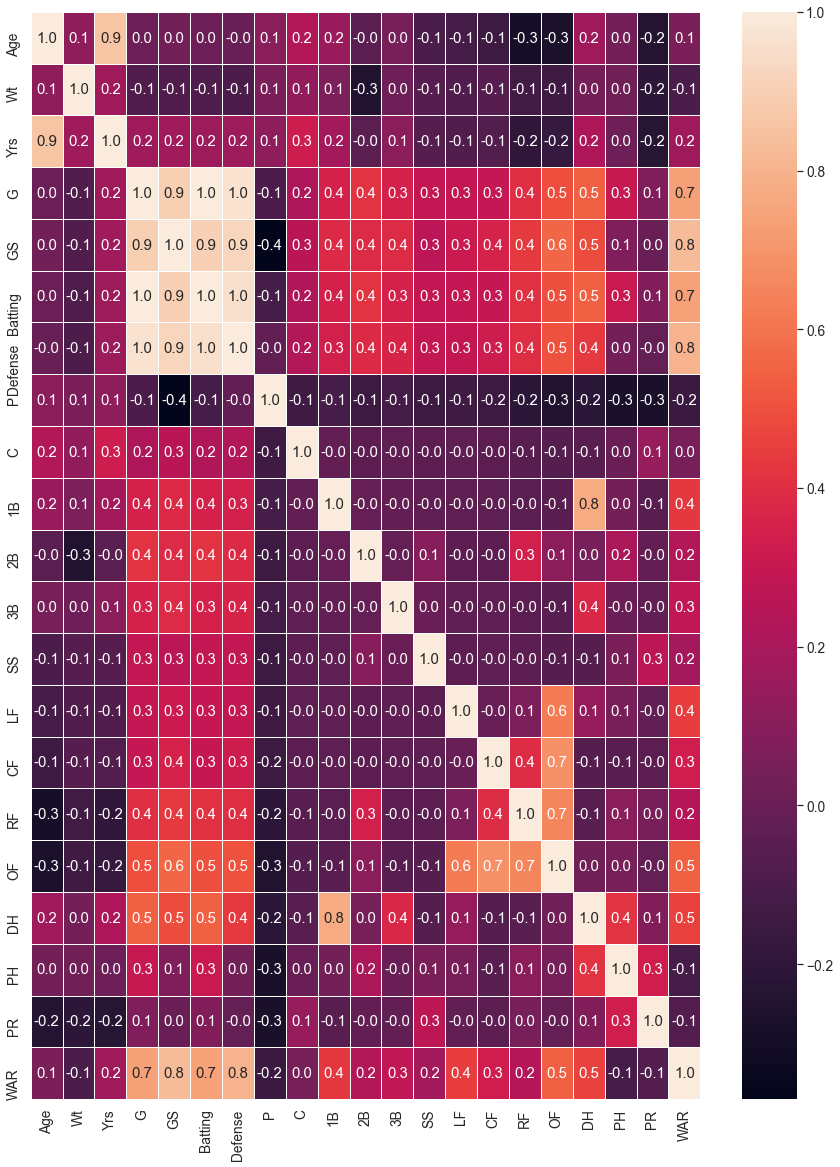

In [244]:
f, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(roster_data.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

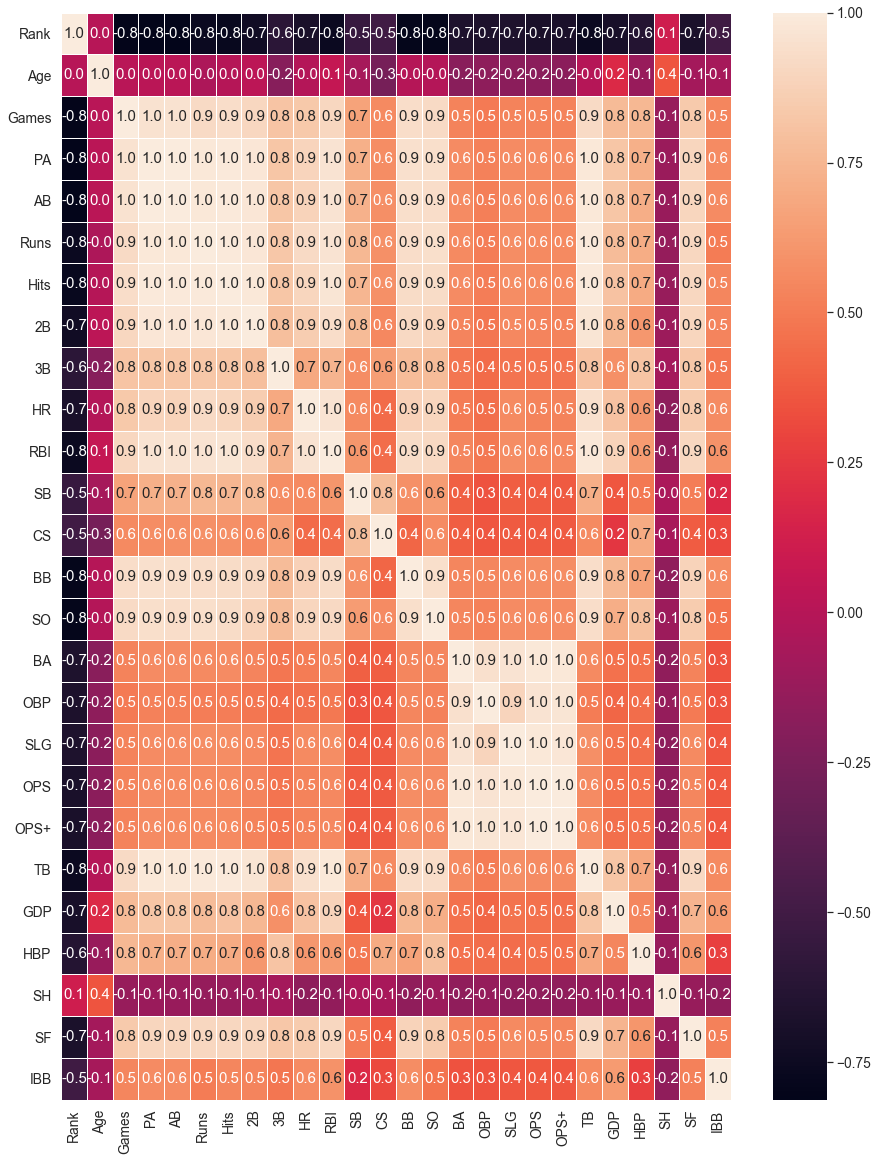

In [245]:
f, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(batting_data.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

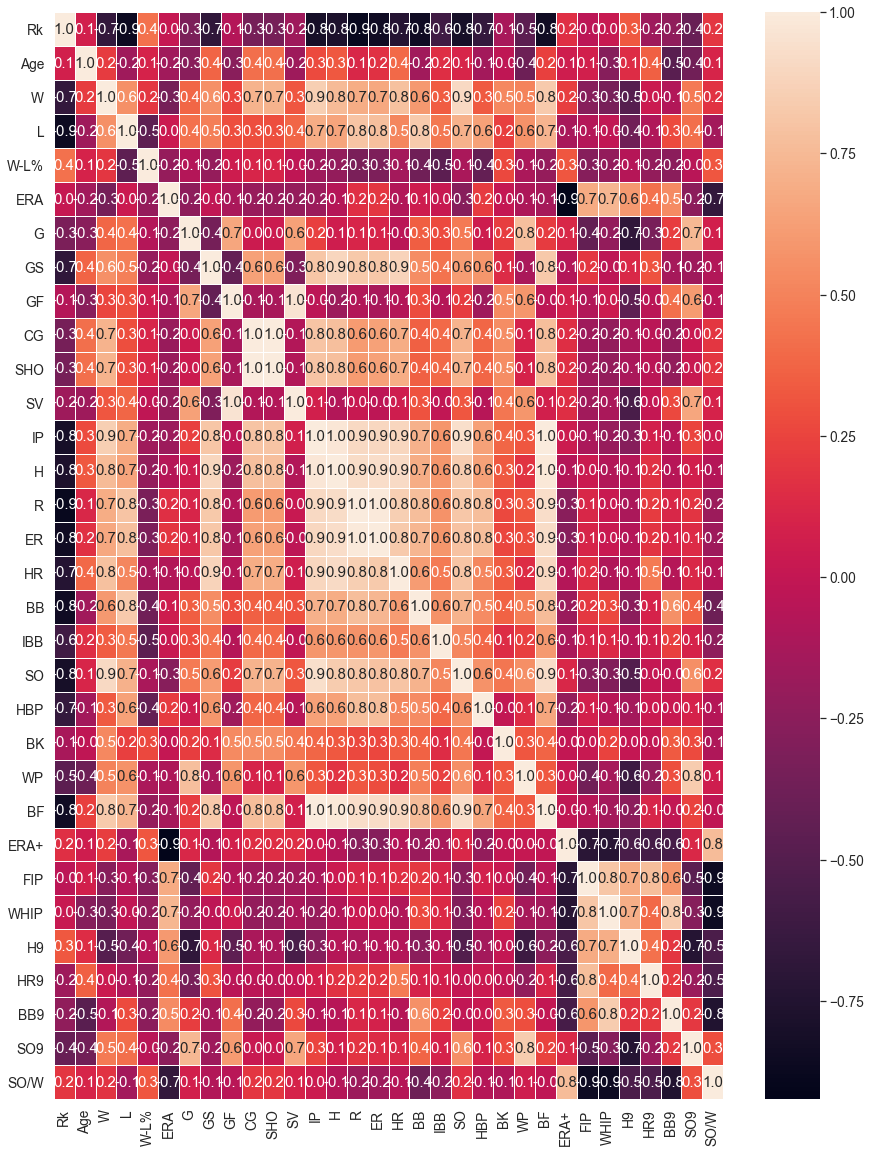

In [246]:
f, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(pitching_data.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

### Create time series topredict whether an unstable player (Matt Carpenter) has an award

In [247]:
df_matt = pd.read_csv('Yadier.csv')
drop_columns = ['2B','3B','CS','GDP','HBP','SH','SF','IBB','Rbaser','Rdp','Rfield','Rpos']
df_matt.drop(drop_columns, axis=1, inplace = True)

In [248]:
df_matt

,Year,Age,G,PA,AB,R,H,HR,RBI,SB,...,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Awards
0,2004,21,51,151,135,12,36,2,15,0,...,-0.1,5,4,0.4,0.499,0.500,0.2,0.4,2,0
1,2005,22,114,421,385,36,97,8,49,2,...,0.2,13,15,1.4,0.502,0.501,0.3,1.8,4,0
2,2006,23,129,461,417,29,90,6,49,1,...,-1.5,14,0,-0.2,0.489,0.491,-1.4,2.0,-13,0
3,2007,24,111,396,353,30,97,6,40,1,...,0.9,12,22,2.1,0.509,0.506,0.6,2.1,7,0
4,2008,25,124,485,444,37,135,7,56,0,...,-0.1,15,16,1.3,0.500,0.500,1.1,1.0,13,1
5,2009,26,140,544,481,45,141,6,54,9,...,1.5,17,32,3.1,0.511,0.510,2.1,1.9,22,1
6,2010,27,136,521,465,34,122,6,62,8,...,1.5,16,32,3.1,0.512,0.510,1.0,2.9,12,1
7,2011,28,139,518,475,55,145,14,65,4,...,1.4,16,29,2.9,0.510,0.509,3.2,0.6,32,1
8,2012,29,138,563,505,65,159,22,76,12,...,5.5,18,69,7.2,0.540,0.534,5.1,2.9,51,1
9,2013,30,136,541,505,68,161,12,80,3,...,4.4,18,58,6.2,0.533,0.528,4.4,2.7,42,1


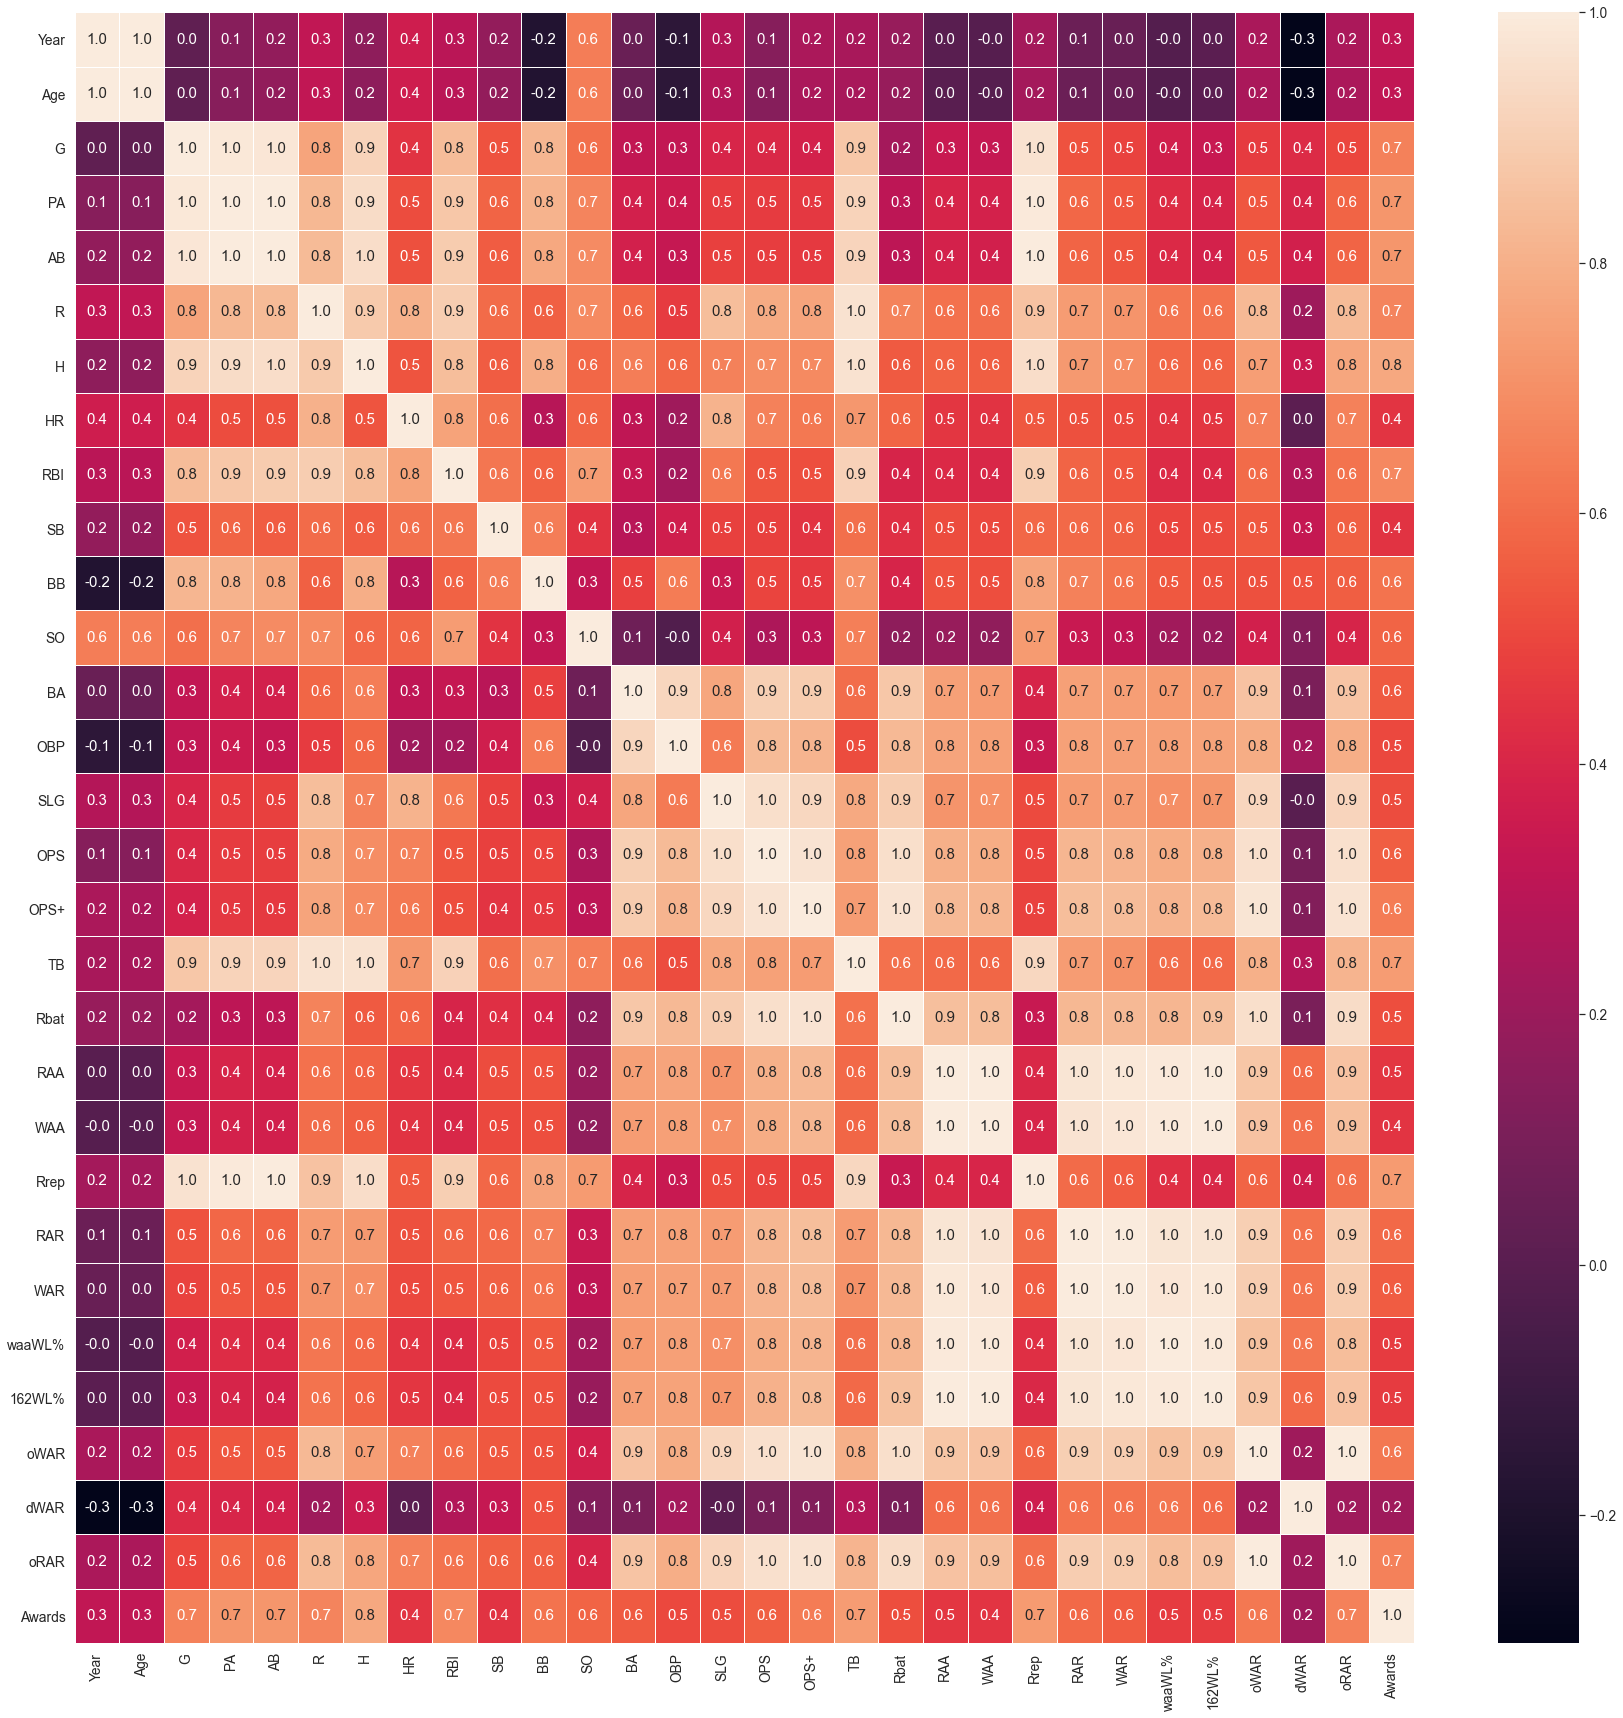

In [249]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_matt.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

Index(['Awards', 'H', 'TB', 'Rrep', 'AB', 'PA', 'RBI', 'R', 'oRAR', 'G',
       'OPS+'],
      dtype='object')
[[1.         0.77422739 0.73618306 0.73301667 0.72018507 0.71834275
  0.67840474 0.66867105 0.65619177 0.65534815 0.64372069]
 [0.77422739 1.         0.96543851 0.95236454 0.95027623 0.9475763
  0.84503264 0.88602149 0.76862549 0.91554046 0.68386774]
 [0.73618306 0.96543851 1.         0.93181066 0.92297569 0.91584976
  0.90895549 0.96591484 0.8144348  0.87322696 0.7360841 ]
 [0.73301667 0.95236454 0.93181066 1.         0.99520174 0.99148485
  0.90184159 0.85837151 0.60619991 0.96608834 0.48800789]
 [0.72018507 0.95027623 0.92297569 0.99520174 1.         0.99803004
  0.88986953 0.83528475 0.57625372 0.98122039 0.46397187]
 [0.71834275 0.9475763  0.91584976 0.99148485 0.99803004 1.
  0.87701783 0.82205197 0.57294953 0.98620779 0.4597901 ]
 [0.67840474 0.84503264 0.90895549 0.90184159 0.88986953 0.87701783
  1.         0.8944476  0.61795271 0.83957154 0.51858501]
 [0.66867105 0.8

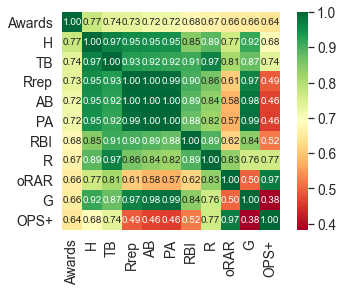

In [250]:
k = 11
corrmat = df_matt.corr()
cols = corrmat.abs().nlargest(k,'Awards')['Awards'].index
print(cols)
cm = np.corrcoef(df_matt[cols].values.T)
print(cm)
sns.set(font_scale=1.25)
heatmap = sns.heatmap(cm, cbar=True, square = True, annot=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap ='RdYlGn')
plt.show() 

In [251]:
y = df_matt['Awards'].values
X = df_matt.drop(['Awards'],axis = 1).values

In [252]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import plot_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,accuracy_score, f1_score,roc_auc_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [253]:
def baseline_prediction(X,y,ratio):
    '''
    This function will take input of the dataset split into the feature set and target
    It runs logistic regression, decision tree, random forest, and xgboost
    output train and test scores'''
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=ratio,random_state=99)

    # Scaling is Needed for Knn
    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    
     # Naive Bayes
    nb_base = GaussianNB()
    nb_base.fit(X_train,y_train)
    pred_nb_base = nb_base.predict(X_train)
    score_nb_base = accuracy_score(y_train,pred_nb_base)
    
    pred_nb_base_test = nb_base.predict(X_test)
    score_nb_base_test = accuracy_score(y_test,pred_nb_base_test)
    print('Naive Bayes Accuracy\nTrain={} Test={}'.format(round(score_nb_base,3),round(score_nb_base_test,3)))

    # Logistic Regression
    lr_base = LogisticRegression(random_state=99)
    lr_base.fit(X_train,y_train)
    pred_lr_base = lr_base.predict(X_train)
    score_lr_base = accuracy_score(y_train,pred_lr_base)
    
    pred_lr_base_test = lr_base.predict(X_test)
    score_lr_base_test = accuracy_score(y_test,pred_lr_base_test)
    print('Logistic Regression Accuracy\nTrain={} Test={}'.format(round(score_lr_base,3),round(score_lr_base_test,3)))
    
    
    # Decision Tree
    tree_base = DecisionTreeClassifier(max_depth=15)
    tree_base.fit(X_train,y_train)
    pred_tree_base = tree_base.predict(X_train)
    score_tree_base = accuracy_score(y_train,pred_tree_base)

    pred_tree_base_test = tree_base.predict(X_test)
    score_tree_base_test = accuracy_score(y_test,pred_tree_base_test)
    print('Decision Tree Accuracy\nTrain={} Test={}'.format(round(score_tree_base,3),round(score_tree_base_test,3)))

          
    # Random Forest
    rand_base = RandomForestClassifier()
    rand_base.fit(X_train,y_train)
    pred_rand_base = rand_base.predict(X_train)
    score_rand_base = accuracy_score(y_train,pred_rand_base)

    pred_rand_base_test = rand_base.predict(X_test)
    score_rand_base_test = accuracy_score(y_test,pred_rand_base_test)
    print('Random Forest Accuracy\nTrain={} Test={}'.format(round(score_rand_base,3),round(score_rand_base_test,3)))

    
    #XG Boost
    xg_base = xgb.XGBClassifier(objective='binary:logistic')
    xg_base.fit(X_train,y_train)
    pred_xg_base = xg_base.predict(X_train)
    score_xg_base = accuracy_score(y_train,pred_xg_base)

    pred_xg_base_test = xg_base.predict(X_test)
    score_xg_base_test = accuracy_score(y_test,pred_xg_base_test)
    print('XGBoost Accuracy\nTrain={} Test={}'.format(round(score_xg_base,3),round(score_xg_base_test,3)))
    
    #Lightgbm
    light_base = LGBMClassifier(objective='binary')
    light_base.fit(X_train,y_train)
    pred_light_base = light_base.predict(X_train)
    score_light_base = accuracy_score(y_train,pred_light_base)

    pred_light_base_test = light_base.predict(X_test)
    score_light_base_test = accuracy_score(y_test,pred_light_base_test)
    print('Lightgbm Accuracy\nTrain={} Test={}'.format(round(score_light_base,3),round(score_light_base_test,3)))

In [254]:
baseline_prediction(X,y,0.8)

Naive Bayes Accuracy
Train=1.0 Test=0.267
Logistic Regression Accuracy
Train=1.0 Test=0.6
Decision Tree Accuracy
Train=1.0 Test=0.4
Random Forest Accuracy
Train=1.0 Test=0.4
[17:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy
Train=0.667 Test=0.267
Lightgbm Accuracy
Train=0.667 Test=0.267


C:\Users\Shane\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
